In [2]:
import matplotlib.pyplot as plt
import numpy as np
import constant
%load_ext autoreload
%autoreload 2

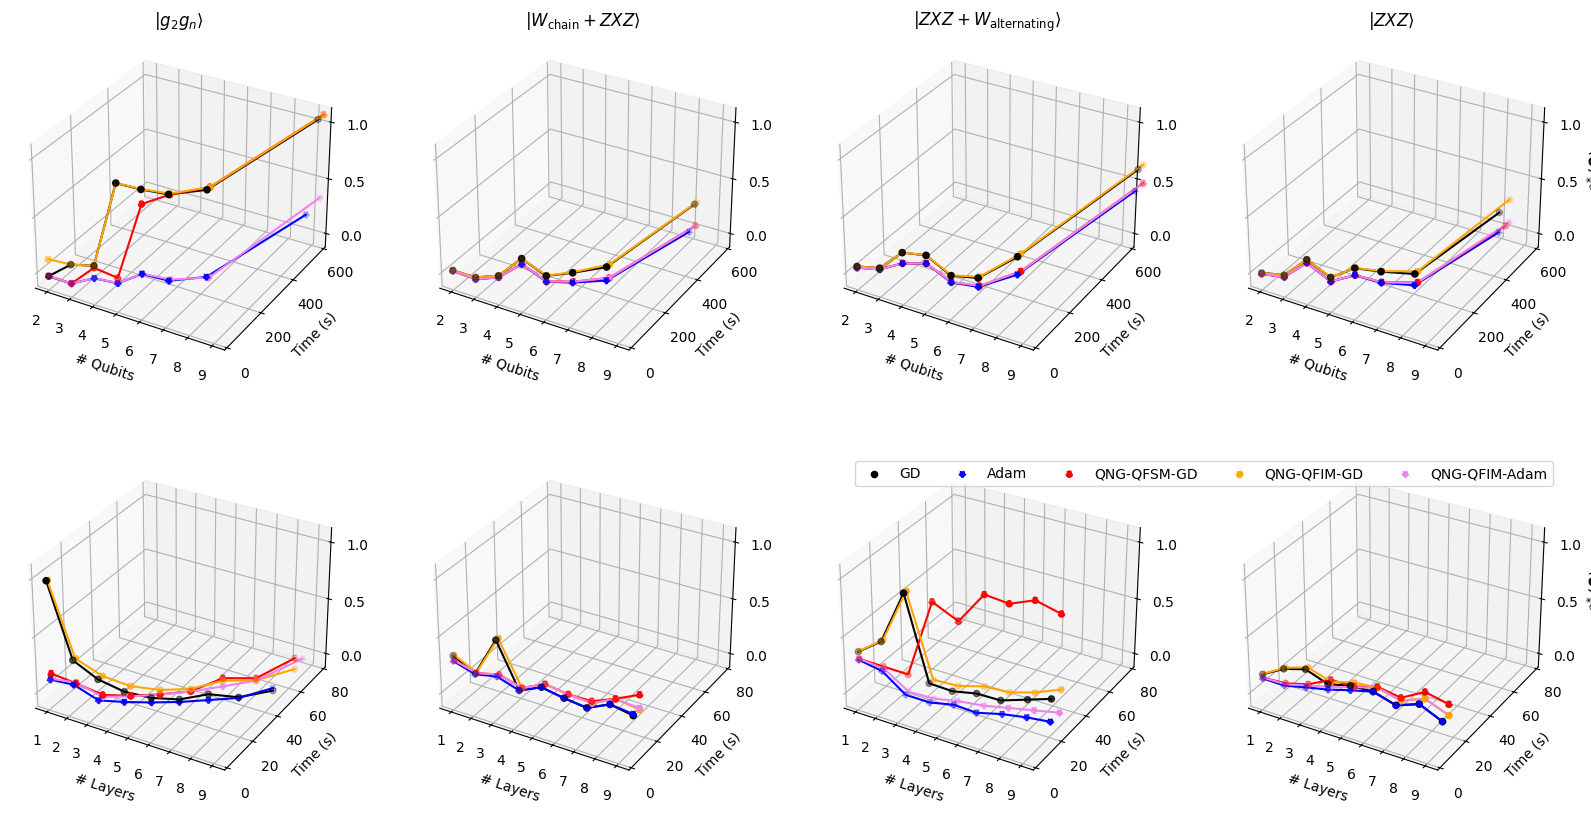

In [45]:
# Create a figure object
fig = plt.figure(figsize=(20, 10))

# Create 4x2 subplots
axes = []
for i in range(1, 9):
    ax = fig.add_subplot(2, 4, i, projection='3d')
    axes.append(ax)

t = 0
for type in [0,1]:
    for k, ansatz in enumerate(constant.ansatzs):
        
        ax = axes[t]
        t += 1
        if type == 0:
            # --------- Begin: Draw cost and time for various qubit numbers ---------
            num_qubits = list(range(2, 10)) # 2 to 10 qubit
            num_layer = 1
            ansatz = constant.ansatzs[k]
            for j, optimizer in enumerate(constant.optimizers_name):
                losss = []
                times = []
                for i, num_qubit in enumerate(num_qubits):
                    # Load data
                    loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
                    time = np.loadtxt(f"./data/time/wonder40/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

                    losss.append(loss[j][-1])
                    times.append(time[j])
                ax.scatter(list(range(2, 10)) , times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colorss[j])
                ax.plot3D(list(range(2, 10)) , times, losss, color = constant.colorss[j])     # Plot lines between points
            # --------- End: Draw cost and time for various qubit numbers ---------
        if type == 1:
            # --------- Begin: Draw cost and time for various layer numbers ---------
            num_layers = list(range(1, 10)) # 2 to 10 qubit
            num_qubit = 5
            for j, optimizer in enumerate(constant.optimizers_name):
                losss = []
                times = []
                for i, num_layer in enumerate(num_layers):
                    # Load data
                    loss = np.loadtxt(f"./data/loss/loss_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")
                    time = np.loadtxt(f"./data/time/wonder40/times_{num_qubit}qubit_{num_layer}layer_{ansatz}.txt")

                    losss.append(loss[j][-1])
                    times.append(time[j])
                ax.scatter(list(range(1, 10)), times, losss, marker = 'o', label = constant.optimizers_name[j], linestyle = constant.line_styles[j], color = constant.colorss[j])
                ax.plot3D(list(range(1, 10)) , times, losss, color = constant.colorss[j])     # Plot lines between points
            # --------- End: Draw cost and time for various layer numbers ---------
        if type == 0:
            if k == 0:
                ax.set_title(r"$|g_2 g_n \rangle $")
            if k == 1:
                ax.set_title(r"$|W_{\text{chain}}+ZXZ \rangle $")
            if k == 2:
                ax.set_title(r"$|ZXZ+W_{\text{alternating}} \rangle $") 
            if k == 3:
                ax.set_title(r"$|ZXZ \rangle $")     
        if type == 0:
            ax.set_xlabel("# Qubits")
            ax.set_ylim(0, 600)
            ax.set_yticks([0, 200, 400, 600])
            ax.set_xticks(list(range(2, 10)))
        else:
            ax.set_xlabel("# Layers")
            ax.set_ylim(0, 80)
            ax.set_yticks([0, 20, 40, 60, 80])
            ax.set_xticks(list(range(1, 10)))
        ax.set_ylabel("Time (s)")
        if k == 3:
            ax.set_zlabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
        ax.set_zlim(-0.1, 1.1)
        ax.set_zticks([0, 0.5, 1])
        # ax.set_ylabel("Z")
        # if type == 0:
        #     ax.set_ylabel(r"$\mathcal{C}^* (\boldsymbol{\theta})$", fontsize = 12)
        # if type == 1:
        #     ax.set_yticklabels([])
        # if k == 3:
        #     
        # else:
        #     ax.set_xticklabels([])
        # if type == 1 and k == 3:
plt.legend(ncol = 5)
#plt.tight_layout()
plt.savefig('./data/images/new_mincost_vs_times.svg', bbox_inches='tight')
plt.show()